In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("weather.csv")

In [3]:
data = data.drop(
    ['Events', 'Date', 'SeaLevelPressureHighInches', 'SeaLevelPressureLowInches'], axis=1)

In [4]:
data = data.replace('T', 0.0)
data = data.replace('-', 0.0)

In [5]:
data.to_csv('final.csv')

In [6]:
data = pd.read_csv("final.csv")

In [7]:
X = data.drop(['PrecipitationSumInches'], axis=1)

In [8]:
Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1, 1)

In [9]:
day_index = 798
days = [i for i in range(Y.size)]

In [10]:
clf = LinearRegression()
clf.fit(X, Y)

LinearRegression()

In [11]:
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])

In [12]:
inp = inp.reshape(1, -1)

In [13]:
print('The precipitation in inches for the input is:', clf.predict(inp))

The precipitation in inches for the input is: [[1.33868402]]


The precipitation trend graph: 


Text(0, 0.5, 'Precipitation in inches')

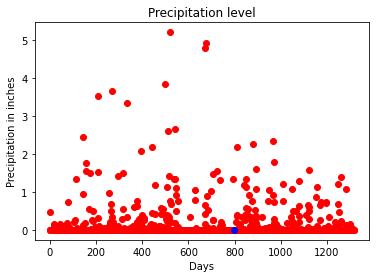

In [16]:
print('The precipitation trend graph: ')
plt.scatter(days, Y, color='r')
plt.scatter(days[day_index], Y[day_index], color='b')
plt.title('Precipitation level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')

In [17]:
plt.show()

Preciptiation Vs Selected Attributes Graph: 


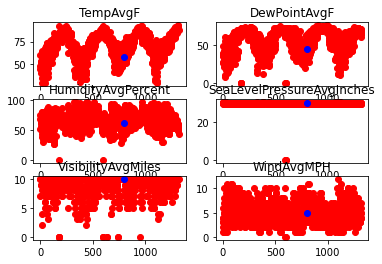

In [19]:
x_f = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                'WindAvgMPH'], axis=1)
print('Preciptiation Vs Selected Attributes Graph: ')
for i in range(x_f.columns.size):
    plt.subplot(3, 2, i+1)
    plt.scatter(days, x_f[x_f.columns.values[i][:100]], color='r')
    plt.scatter(days[day_index], x_f[x_f.columns.values[i]]
                [day_index], color='b')
    plt.title(x_f.columns.values[i])

In [20]:
plt.show()